# Transient analysis

Study the apparently large number of transients detected by the TS map technique. Especially, how many of the unassociated ones show up in other months.

First CD to the monthly directory and import needed modules

In [21]:
%matplotlib inline
from uw.like2.analyze import (transientinfo, )
map( reload, (transientinfo,))
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_monthly'))

Load the object that reads in information of each of 72 months, and the original 6-year 

In [6]:
%time ta = transientinfo.Analysis(last=72) # number of months processed

CPU times: user 1min 22s, sys: 6.34 s, total: 1min 28s
Wall time: 1min 31s


In [7]:
y = set(ta.all_6y_names())
ll =np.asarray([ len( set(mi.df.index).intersection(y)) for mi in ta.monthinfo ],float)
pd.Series( [('6-year sources', len(y)), ('mean', ll.mean()), ('rms', ll.std()) ])

0    (6-year sources, 6568)
1     (mean, 1206.04109589)
2       (rms, 48.651806864)
dtype: object

In [8]:
#ta.monthly_totals();

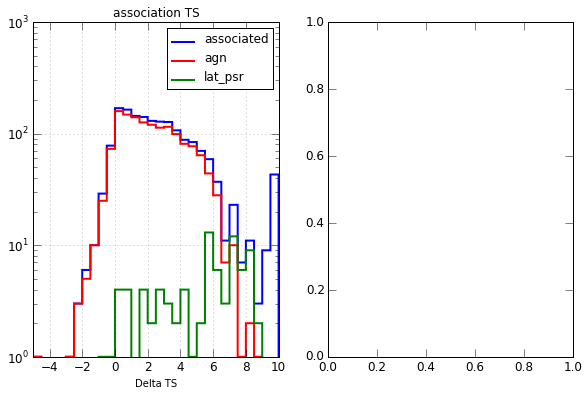

In [9]:
transientinfo.plots(ta);

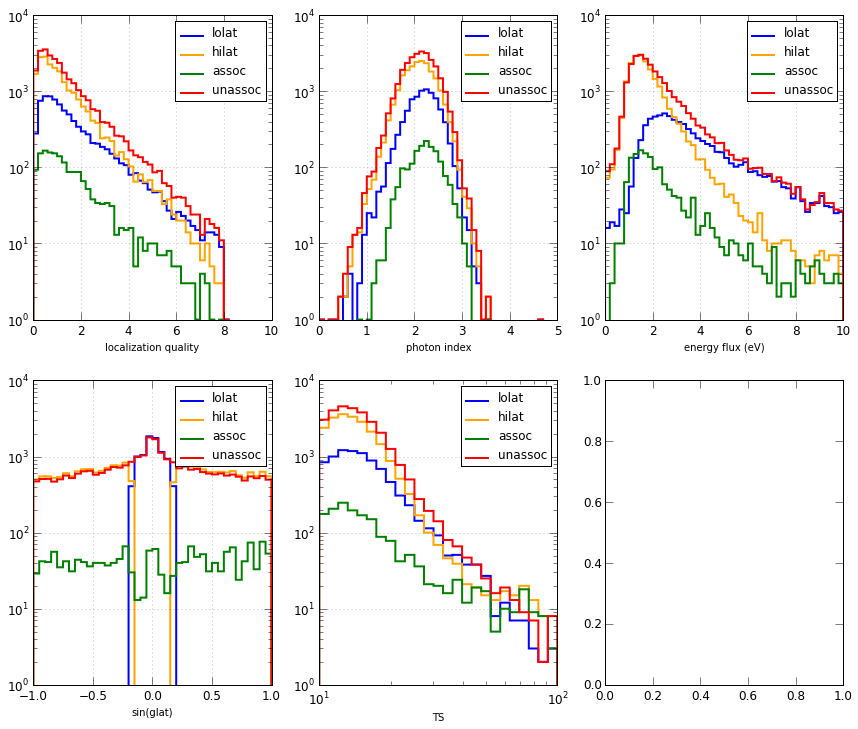

In [10]:
reload(transientinfo)
transientinfo.plots2(ta);

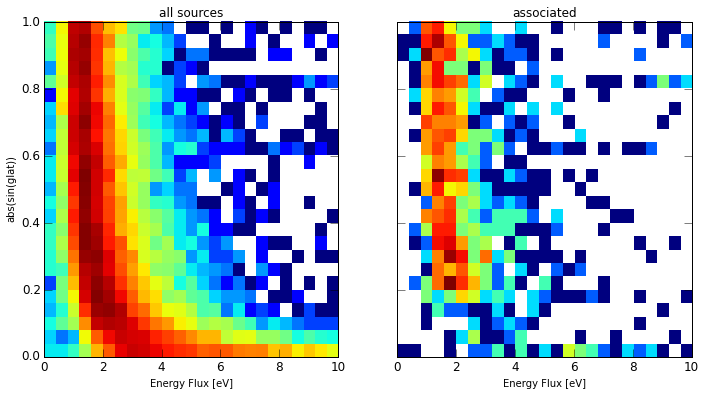

In [11]:
fig, axx = plt.subplots(1,2,sharex=True, sharey=True, figsize=(12,6))
from matplotlib.colors import LogNorm
bins=[np.linspace(0,10,26),np.linspace(0,1,26)]

def plot2d(ax, cut=None ,**kw):
    df = ta.df if cut is None else ta.df[cut]
    x = np.asarray(df.eflux, float) 
    y = np.sin(np.radians(np.abs(np.asarray(df.glat,float)) ))
    ax.hist2d(x, y, bins=bins , norm=LogNorm());#plt.colorbar(mp)
    plt.setp(ax, xlabel='Energy Flux [eV]', **kw)
plot2d(axx[0], title='all sources', ylabel='abs(sin(glat))')
plot2d(axx[1], ta.assoc, title='associated')

## Study pair-wise angular correlations to look for repetitions 

In [12]:
reload(transientinfo)
alldiffs = transientinfo.pair_correlations(ta, ta.df)

In [13]:
hilat_diffs =transientinfo.pair_correlations(ta, ta.df[ta.hilat])

/afs/slac/g/glast/groups/catalog/python/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1706: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [14]:
assoc_diffs = transientinfo.pair_correlations(ta, ta.df[ta.assoc])

In [15]:
unassoc = np.logical_not(ta.assoc)
unassoc_diffs =transientinfo.pair_correlations(ta, ta.df[unassoc])

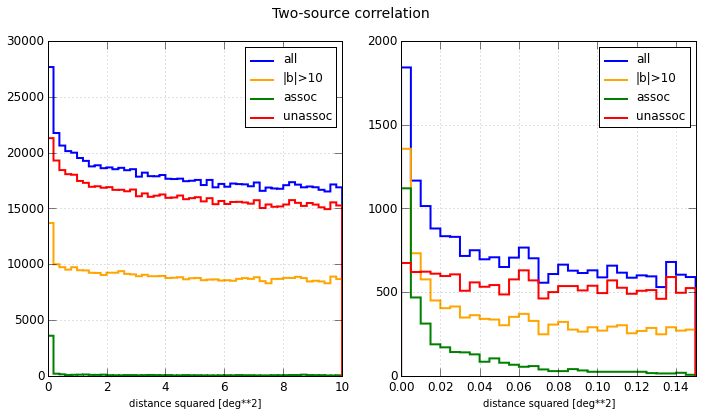

In [16]:
flg, axx = plt.subplots(1,2, figsize=(12,6))

for bins, ax in zip(
        [np.linspace(0,10,51),np.linspace(0,0.15,31)], axx, ):
    ax.hist(alldiffs**2, bins, label='all',color='blue', lw=2, histtype='step');
    ax.hist(hilat_diffs**2, bins, label='|b|>10',color='orange', lw=2, histtype='step');
    ax.hist(assoc_diffs**2, bins, label='assoc',color='green', lw=2, histtype='step');
    ax.hist(unassoc_diffs**2, bins, label='unassoc',color='red', lw=2, histtype='step');
    ax.grid(True, alpha=0.5)
    plt.setp(ax, xlabel='distance squared [deg**2]', xlim=(0, bins[-1]))
    leg=ax.legend() 
    for box in leg.get_patches():
        box._height=0; box._y=0.5
plt.suptitle('Two-source correlation', size=14);

## Examine a few example sources
 I chose this high-latitude source.
 Load the month and ROI below

In [17]:
d16 = ta.df[ta.hilat & (ta.df.month==16) ]
name = 'TSh16-1238'
example = ta.df.ix[name]
example

ra                                                     15.2469
dec                                                  -68.30162
glat                                                 -48.80183
glon                                                  301.5922
ts                                                    12.53731
pindex                                                2.336017
eflux                                                 1.255876
flux                                              2.586051e-12
a                                                    0.1180454
locqual                                                   0.91
aprob                                                      NaN
acat                                                       NaN
adeltats                                                   NaN
has_assoc                                                False
month                                                       16
skydir       (0.356706930378, 0.0972287607472, -0.92914

### Load the model for its month and ROI

In [22]:
from uw.like2 import main, process, dataset
reload(dataset)
os.chdir('month%2d'%example.month)
r = process.Process('.', quiet=True)
os.chdir('..')
r.setup_roi(example.roi)

Failed gti check:
  ltcube: Gti: 555 intervals from 278780000 to 281410000, on time 2140215 
 binfile: Gti: 563 intervals from 278780017 to 281409979, on time 2139937
26 total sources: 0 extended, 3 global


In [23]:
r.print_summary()
r.summarize()

------------------------------------------------------------------------------------------ 
	 Nearby sources within 5.0 degrees HP12_1541
name               dist        ra       dec        TS eflux(eV)    index   energy   beta/b
TSh16-1238          1.4    15.247   -68.302        13       6.5*    2.34*     697     0
PSR J0101-6422      2.5    15.287   -64.368        19       5.6*    1.13     1826     1
TSh16-1223          2.9    16.521   -69.772        18       9.1*    1.64*     950     0
TSh16-1247          3.0     7.468   -66.938                 6.0     2.40      627     0
P86Y0204            4.3    12.821   -62.704                 5.9     1.53     2431     0.09 
P86Y0391            4.5    26.575   -67.752                 5.1     2.25     1293     0
TSh16-1226          4.8     3.532   -68.971                 7.2     2.40      454     0
------------------------------------------------------------------------------------------ 
	Diffuse sources
------------------------------------------

There are three sources, including a LAT pulsar! Look at them all

Recreate the SED and TS map plots

TSplot: filling 225 pixels (size=1.92, npix=15)...
TSplot: filling 225 pixels (size=0.84, npix=15)...
TSplot: filling 225 pixels (size=1.77, npix=15)...


/afs/slac/g/glast/groups/catalog/python/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/afs/slac/g/glast/groups/catalog/python/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


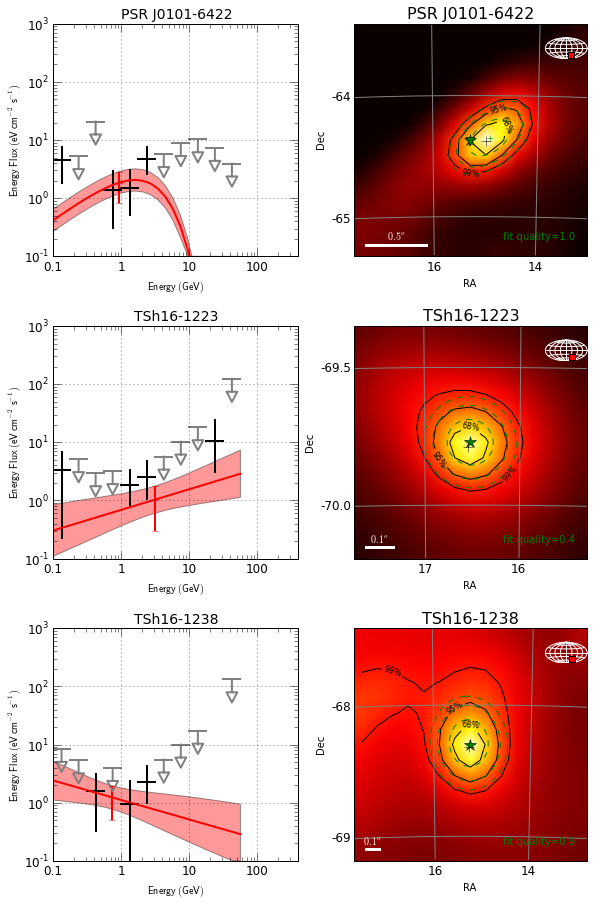

In [24]:
ns = len(r.free_sources)
fig, axx = plt.subplots(ns,2, figsize=(10,5*ns))
plt.subplots_adjust(hspace=0.3)
[r.plot_sed(s.name,axes=ax) for s,ax in zip(r.free_sources,axx[:,0]) ];
[r.plot_tsmap(s.name,axes=ax, nolegend=True) for s,ax in zip(r.free_sources, axx[:,1])];

### The 6-year version of this pulsar's SED:

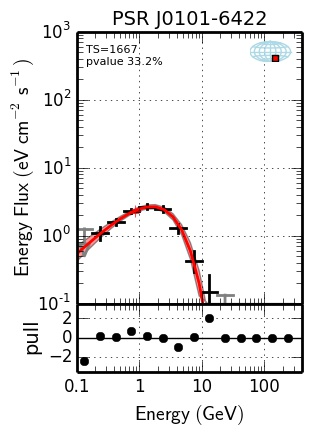

In [25]:
from IPython import display
display.Image('../P301_6years/uw972/sedfig/PSR_J0101-6422_sed_uw972.jpg')

### Write out a csv file

In [ ]:
#ta.df.to_csv('transients.csv')

In [ ]:
ta.df.ix[0]

In [ ]:
df=ta.df
len(df), sum( (np.abs(df.glon)>10) & (df.locqual<8) & np.logical_not(df.has_assoc) )/72.

## Get flux density from the pixel at the location
Read the KDE file for 6 years

In [ ]:
from uw.like2.pub import healpix_map as hpm
filename=os.path.expandvars('$FERMI/skymodels/P301_6years/uw972/hptables_ts_kde_512.fits')
kde6 = hpm.FromFITS(filename,'kde')

In [27]:
ta.df.ix[0]

ra                                                   0.2434747
dec                                                    62.8679
glat                                                 0.5576553
glon                                                  117.2155
ts                                                    12.90328
pindex                                                2.034425
eflux                                                 2.635953
flux                                              2.635953e-12
a                                                   0.07708588
locqual                                                   1.42
aprob                                                      NaN
acat                                                       NaN
adeltats                                                   NaN
has_assoc                                                False
month                                                        1
skydir       (0.456039428943, 0.00193792190261, 0.88995